In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

ds = pd.read_excel('data_set.xlsx')

In [225]:
#NaN FIX
ds['NEAR_metro_rjd'].fillna(0, inplace=True)
ds['NEAR_Stations'].fillna(0, inplace=True)
m = {'остановка' : 1, 0 : 0}
ds['NEAR_Stations'] = ds['NEAR_Stations'].map(m)
#ds['cashbox_trend'].fillna(ds['cashbox_trend'].mean(), inplace=True)
#ds['Postamat_trend'].fillna(ds['Postamat_trend'].mean(), inplace=True)
#ds[(ds['cashbox_daily'].notnull()) & (ds['cashbox_trend'].isnull())]

In [226]:
df = ds[ds['REGION'] == 'Тульская область']

In [227]:
def simple(x_name, y_name):
    dbuf = df[(df[x_name].notnull()) & (df[y_name].notnull())]
    x = np.array(dbuf[x_name]).reshape((-1, 1))
    y = np.array(dbuf[y_name])
    skm = LinearRegression()
    skm.fit(x, y)
    return [skm.intercept_, skm.coef_[0]]

def getPrecision(x_name, y_name):
    dbuf = df[(df[x_name].notnull()) & (df[y_name].notnull())]
    x = np.array(dbuf[x_name]).reshape((-1, 1))
    y = np.array(dbuf[y_name])
    model = LinearRegression()
    model.fit(x, y)
    model = LinearRegression().fit(x, y)
    return [model.intercept_, model.coef_[0]]

def getOX(ma, mi):
    result = []
    step = (ma - mi) / 10
    for i in range(10):
        result.append(mi + step*i)
    return result
        
    

In [231]:

#for cashbox_Daily::

def printPlots(target_name, feature_names):
    #feature_names = ['cashbox_MAX', 'cashbox_trend', 'hh_500', 'value1', 'value2', 'NEAR_Malls', 'NEAR_Business_centers', 'NEAR_metro_rjd', 'NEAR_Stations']
    
    data_Tul_Obl = df[(df[target_name].notnull())]
    plt.figure(figsize=(20, 70))
    plot_number = 0
    for feature_name in feature_names:
        plot_number += 1
        plt.subplot(10, 2, plot_number)
        a = simple(feature_name, target_name)
        plt.scatter(data_Tul_Obl[feature_name], data_Tul_Obl[target_name])
        maximum = float(data_Tul_Obl[feature_name].max())
        minimum = float(data_Tul_Obl[feature_name].min())
        OX = getOX(maximum, minimum)
        plt.scatter(OX, [a[1]*x + a[0] for x in OX])
        plt.xlabel(feature_name)
        plt.ylabel(target_name)
            
            

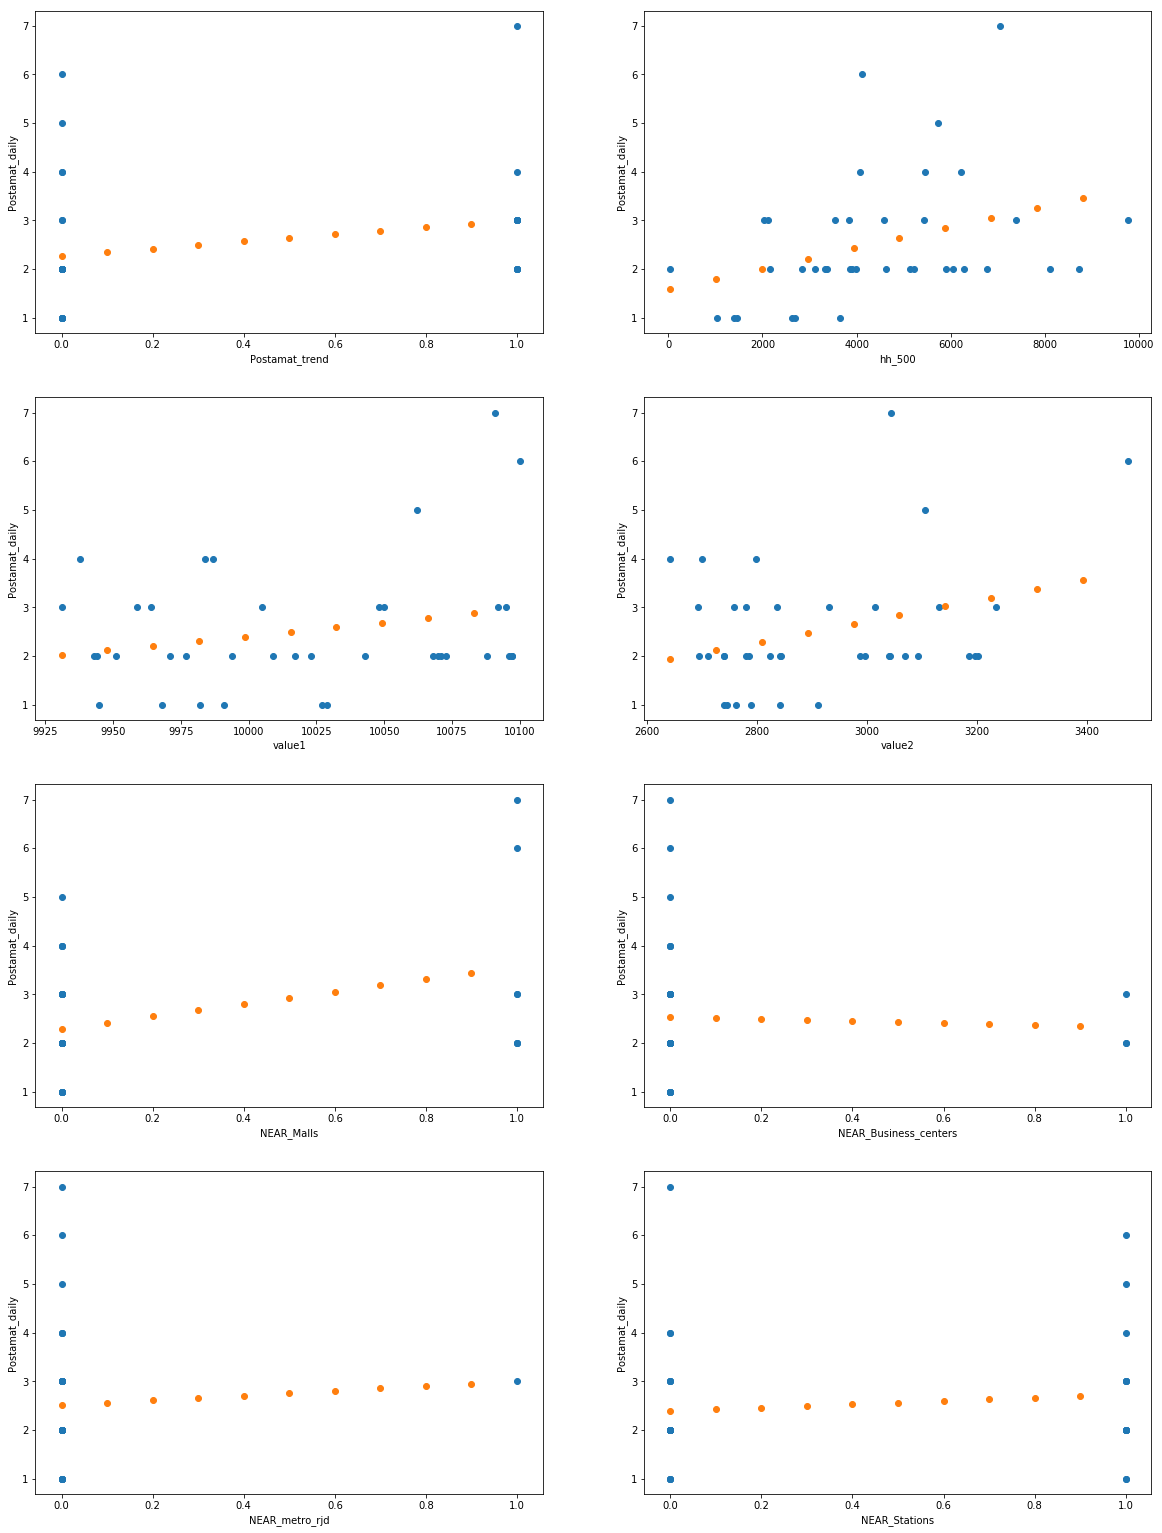

In [232]:
printPlots('Postamat_daily', ['Postamat_trend', 'hh_500', 'value1', 'value2', 'NEAR_Malls', 'NEAR_Business_centers', 'NEAR_metro_rjd', 'NEAR_Stations'])

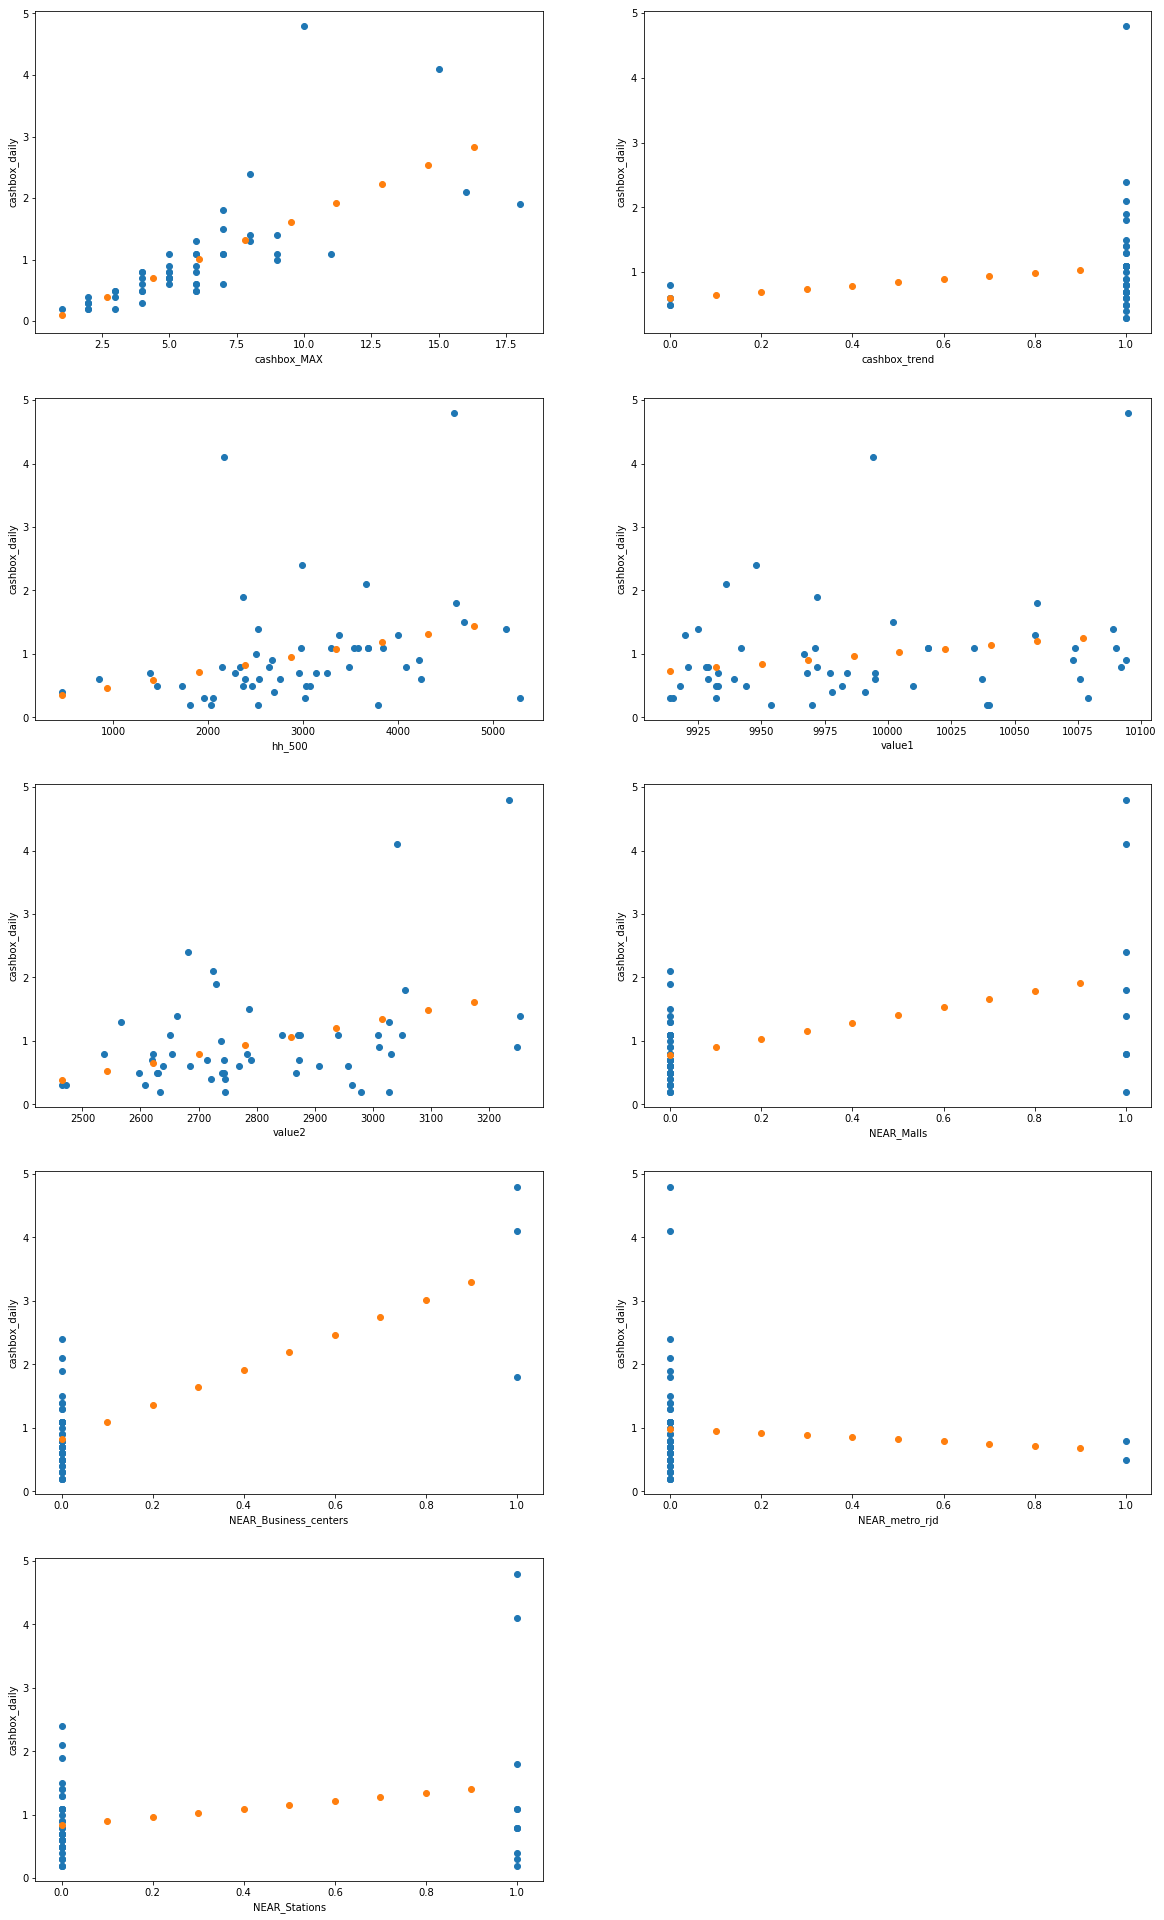

In [233]:
printPlots('cashbox_daily', ['cashbox_MAX', 'cashbox_trend', 'hh_500', 'value1', 'value2', 'NEAR_Malls', 'NEAR_Business_centers', 'NEAR_metro_rjd', 'NEAR_Stations'])

[0.7902594748214042, 0.09051447258287429]